<sup>This notebook is adapted from https://github.com/data-8/data8assets and licensed for reuse under [Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)](http://creativecommons.org/licenses/by-nc/4.0/).</sup>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [3]:
little_women_url = 'https://s3.eu-west-2.amazonaws.com/ox-p4ds-assets/datasets/pg514.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [4]:
import pandas as pd
df = pd.DataFrame(columns=['Chapters'], data=little_women_chapters)
df

,Chapters
0,"ONE PLAYING PILGRIMS ""Christmas won't be Chris..."
1,TWO A MERRY CHRISTMAS Jo was the first to wake...
2,"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?..."
3,"FOUR BURDENS ""Oh, dear, how hard it does seem ..."
4,"FIVE BEING NEIGHBORLY ""What in the world are y..."
5,SIX BETH FINDS THE PALACE BEAUTIFUL The big ho...
6,"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is..."
7,"EIGHT JO MEETS APOLLYON ""Girls, where are you ..."
8,"NINE MEG GOES TO VANITY FAIR ""I do think it wa..."
9,"TEN THE P.C. AND P.O. As spring came on, a new..."


In [5]:
np.char.count(little_women_chapters, 'Christmas')

array([8, 9, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

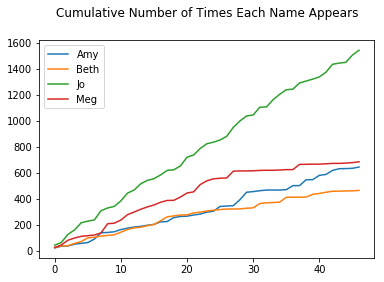

In [6]:
# Counts of names in the chapters of Little Women
counts = pd.DataFrame({
    'Amy': np.char.count(little_women_chapters, 'Amy'),
    'Beth': np.char.count(little_women_chapters, 'Beth'),
    'Jo': np.char.count(little_women_chapters, 'Jo'),
    'Meg': np.char.count(little_women_chapters, 'Meg')
})
# Plot the cumulative counts
cum_counts = counts.cumsum()
cum_counts.set_index(np.arange(1, 48, 1), 'Chapter')
cum_counts.plot()
_ = plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [7]:
chars_periods_little_women = pd.DataFrame({
    'Chapter Length in Letters/Characters': [len(s) for s in little_women_chapters],
    'Number of Full Stops': np.char.count(little_women_chapters, '.')
})
chars_periods_little_women

,Chapter Length in Letters/Characters,Number of Full Stops
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255
5,14622,140
6,14431,131
7,22476,214
8,33767,337
9,18507,185


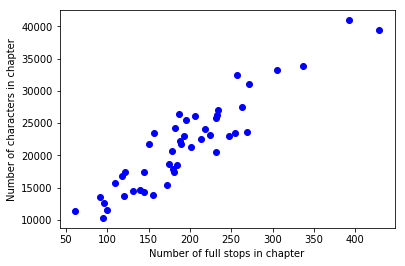

In [8]:
plots.scatter(chars_periods_little_women[chars_periods_little_women.columns[1]], 
              chars_periods_little_women[chars_periods_little_women.columns[0]], 
              color='blue')
plots.xlabel('Number of full stops in chapter')
_ = plots.ylabel('Number of characters in chapter')